# Holiday Package Recommendations using different ML algorithms
As a travel-holic person, I thought to choose a tourism-related dataset where I can apply different ML algorithms on it. The chosen dataset is for a travel company that collected different details about its customers, & it wants to predict whether their new customers will buy their advertised packages or no.

* The dataset can be found here: https://www.kaggle.com/susant4learning/holiday-package-purchase-prediction

- toc: true
- comments: true
- image: images/cosmos.jpg
- categories: [project]
- tags: [Numpy, Pandas, Scikit_learn]
- badges: true
- twitter_large_image: true
- featured: true

#### The dataset has the follwing features:
- CusotmerID: Unique Cusotmer ID
- ProdTaken: Whether a customer ourchased the product or not
- Age: Customer age
- TypeofContact: Mean of communication with the customer
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- DurationofPitch: Duration of the pitch by a salesperson to the customer
- Occupation: Occupation of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Package proposed to the customer
- PreferredPropertyStar: PPreferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore: CSales pitch satisfaction score
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

In [1]:
# import libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
#read in the dataset
data = pd.read_csv("Holiday Package Prediction.csv")

In [3]:
data.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

#### As we can see, we have couple of columns which have missing values & need to be processed

In [5]:
print("Unique Values of columns:\n")
for col in data.columns:
    print("{}:     {}".format(col, data[col].unique()))

Unique Values of columns:

CustomerID:     [200000 200001 200002 ... 204885 204886 204887]
ProdTaken:     [1 0]
Age:     [41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.]
TypeofContact:     ['Self Enquiry' 'Company Invited' nan]
CityTier:     [3 1 2]
DurationOfPitch:     [  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  nan  24.  35.  28.  20.  26.  34.
  23.   5.  19. 126.   7.  36. 127.]
Occupation:     ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender:     ['Female' 'Male' 'Fe Male']
NumberOfPersonVisiting:     [3 2 1 4 5]
NumberOfFollowups:     [ 3.  4.  2.  5. nan  1.  6.]
ProductPitched:     ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
PreferredPropertyStar:     [ 3.  4.  5. nan]
MaritalStatus:     ['Single' 'Divorced' 'Married' 'Unmarried']
NumberOfTrips:     [ 1.  

In [6]:
data.describe()

CustomerID    ProdTaken          Age     CityTier  DurationOfPitch  \
count    4888.000000  4888.000000  4662.000000  4888.000000      4637.000000   
mean   202443.500000     0.188216    37.622265     1.654255        15.490835   
std      1411.188388     0.390925     9.316387     0.916583         8.519643   
min    200000.000000     0.000000    18.000000     1.000000         5.000000   
25%    201221.750000     0.000000    31.000000     1.000000         9.000000   
50%    202443.500000     0.000000    36.000000     1.000000        13.000000   
75%    203665.250000     0.000000    44.000000     3.000000        20.000000   
max    204887.000000     1.000000    61.000000     3.000000       127.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             4888.000000        4843.000000            4862.000000   
mean                 2.905074           3.708445               3.581037   
std                  0.724891           1.002509               0.798009   
min                  1.000000           1.000000               3.000000   
25%                  2.000000           3.000000               3.000000   
50%                  3.000000           4.000000               3.000000   
75%                  3.000000           4.000000               4.000000   
max                  5.000000           6.000000               5.000000   

       NumberOfTrips     Passport  PitchSatisfactionScore       OwnCar  \
count    4748.000000  4888.000000             4888.000000  4888.000000   
mean        3.236521     0.290917                3.078151     0.620295   
std         1.849019     0.454232                1.365792     0.485363   
min         1.000000     0.000000                1.000000     0.000000   
25%         2.000000     0.000000                2.000000     0.000000   
50%         3.000000     0.000000                3.000000     1.000000   
75%         4.000000     1.000000                4.000000     1.000000   
max        22.000000     1.000000                5.000000     1.000000   

       NumberOfChildrenVisiting  MonthlyIncome  
count               4822.000000    4655.000000  
mean                   1.187267   23619.853491  
std                    0.857861    5380.698361  
min                    0.000000    1000.000000  
25%                    1.000000   20346.000000  
50%                    1.000000   22347.000000  
75%                    2.000000   25571.000000  
max                    3.000000   98678.000000

**From the chart above, we can clearly see that the numerical features have different ranges, hence scaling should be considered.**

In [7]:
data.describe(include = "object")

TypeofContact Occupation Gender ProductPitched MaritalStatus  \
count           4863       4888   4888           4888          4888   
unique             2          4      3              5             4   
top     Self Enquiry   Salaried   Male          Basic       Married   
freq            3444       2368   2916           1842          2340   

       Designation  
count         4888  
unique           5  
top      Executive  
freq          1842

In [8]:
travel = data.copy()

In [9]:
numeric_cols = [col for col in travel.columns if data[col].dtype in [np.int64, np.float64]]
print(numeric_cols)

['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']


In [10]:
object_cols = [col for col in travel.columns if data[col].dtype == object]
print(object_cols)

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


### Data Preprocessing & Visualization

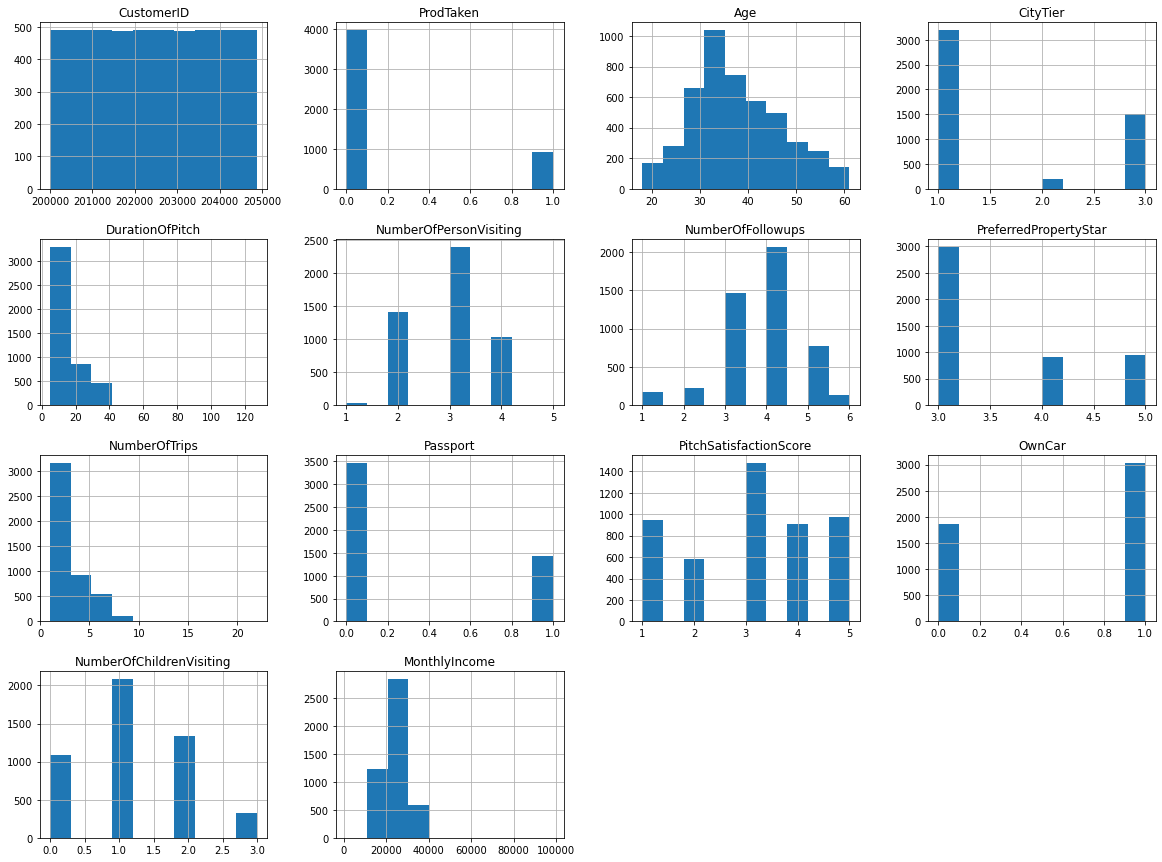

In [11]:
travel[numeric_cols].hist(figsize=(20,15))
plt.show()

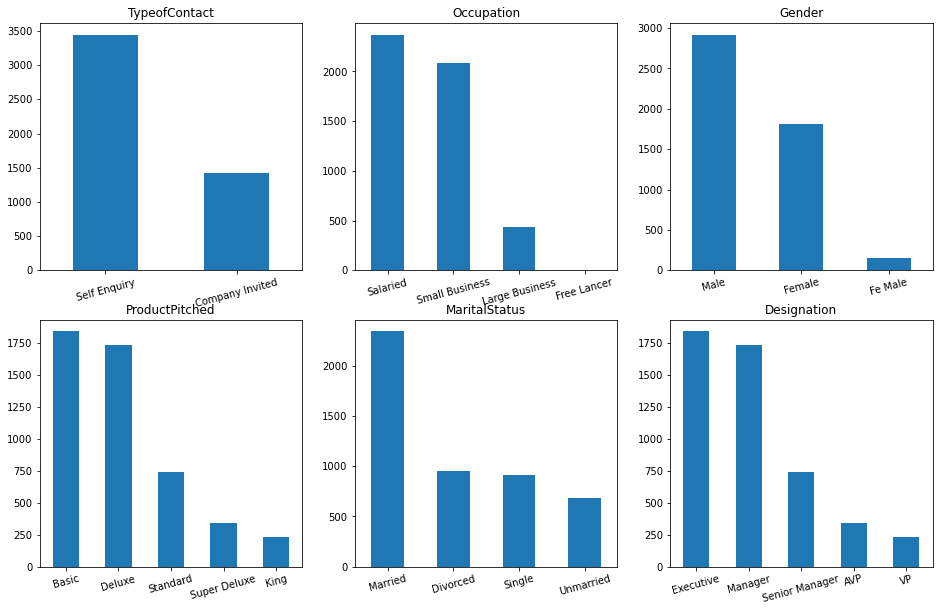

In [12]:
plt.figure(figsize=(16,10))
for i, col in zip(range(1, 7), object_cols):
    plt.subplot(2, 3, i)
    travel[col].value_counts().plot(kind = "bar")
    plt.title(str(col))
    plt.xticks(rotation = 15)
plt.show()

In [13]:
travel.loc[data["Occupation"] == "Free Lancer", ["Occupation"]] = "Salaried"

In [14]:
travel["Gender"].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [15]:
travel.loc[data["Gender"] == "Fe Male", ["Gender"]] = "Female"

In [16]:
travel["Gender"].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [17]:
travel["MaritalStatus"].value_counts()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [18]:
travel.loc[data["MaritalStatus"] == "Unmarried", ["MaritalStatus"]] = "Single"

In [19]:
travel["MaritalStatus"].value_counts()

Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64

### Dealing with Outliers

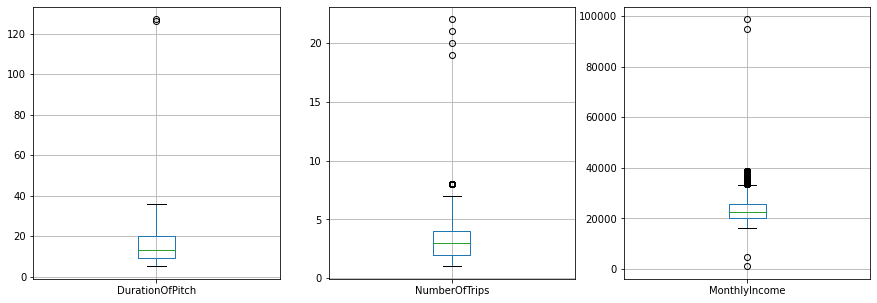

In [20]:
plt.figure(figsize = (15,5))
for i, col in zip(range(1,4),["DurationOfPitch", "NumberOfTrips", "MonthlyIncome"]):
    plt.subplot(1,3, i)
    travel.boxplot(column = col)
plt.show()

In [21]:
travel.loc[travel["MonthlyIncome"] < 5000, "MonthlyIncome"]

142     1000.0
2586    4678.0
Name: MonthlyIncome, dtype: float64

In [22]:
# After finding outliers indices, we drop them
travel = travel.drop(travel.index[[38, 2482, 385, 816, 2829, 3260, 142, 2586, 1434,3878]])

### Features Correlation

In [23]:
travel[numeric_cols].corr()["ProdTaken"]

CustomerID                  0.056792
ProdTaken                   1.000000
Age                        -0.146591
CityTier                    0.087495
DurationOfPitch             0.084515
NumberOfPersonVisiting      0.009953
NumberOfFollowups           0.112551
PreferredPropertyStar       0.100368
NumberOfTrips               0.013816
Passport                    0.260593
PitchSatisfactionScore      0.050603
OwnCar                     -0.011985
NumberOfChildrenVisiting    0.006712
MonthlyIncome              -0.134025
Name: ProdTaken, dtype: float64

<AxesSubplot:>

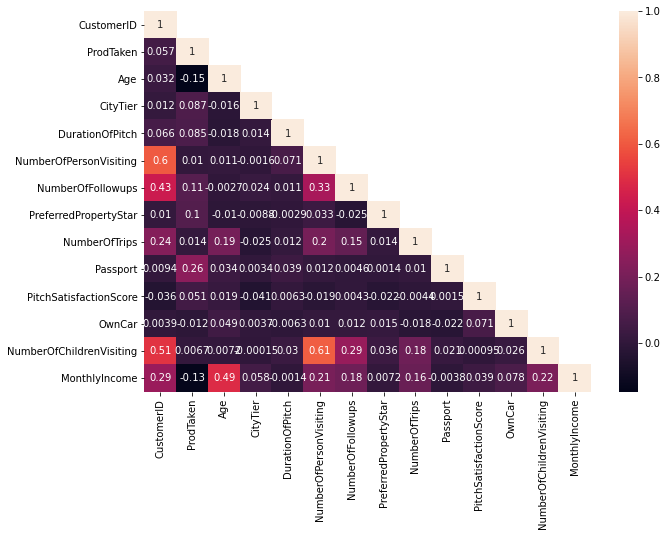

In [24]:
plt.figure(figsize=(10,7))
corr = travel.corr()
# corr = corr.iloc[1:, :-1]
mask = np.triu(np.ones_like(corr), k=1)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, mask = mask, annot = True)

### Dealing with Missing Data

In [25]:
travel.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         225
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        25
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [26]:
cols_with_missing = ["Age", "TypeofContact", "DurationOfPitch", "NumberOfFollowups", "PreferredPropertyStar",
                    "NumberOfTrips", "NumberOfChildrenVisiting", "MonthlyIncome"]
travel[cols_with_missing].describe(include = "all")

Age TypeofContact  DurationOfPitch  NumberOfFollowups  \
count   4653.000000          4853      4627.000000        4833.000000   
unique          NaN             2              NaN                NaN   
top             NaN  Self Enquiry              NaN                NaN   
freq            NaN          3440              NaN                NaN   
mean      37.621320           NaN        15.449319           3.708463   
std        9.321348           NaN         8.208413           1.003123   
min       18.000000           NaN         5.000000           1.000000   
25%       31.000000           NaN         9.000000           3.000000   
50%       36.000000           NaN        13.000000           4.000000   
75%       44.000000           NaN        20.000000           4.000000   
max       61.000000           NaN        36.000000           6.000000   

        PreferredPropertyStar  NumberOfTrips  NumberOfChildrenVisiting  \
count             4853.000000    4738.000000               4812.000000   
unique                    NaN            NaN                       NaN   
top                       NaN            NaN                       NaN   
freq                      NaN            NaN                       NaN   
mean                 3.581290       3.222035                  1.187864   
std                  0.798182       1.780694                  0.858059   
min                  3.000000       1.000000                  0.000000   
25%                  3.000000       2.000000                  1.000000   
50%                  3.000000       3.000000                  1.000000   
75%                  4.000000       4.000000                  2.000000   
max                  5.000000       8.000000                  3.000000   

        MonthlyIncome  
count     4645.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean     23600.630786  
std       5147.662625  
min      16009.000000  
25%      20346.000000  
50%      22351.000000  
75%      25571.000000  
max      38677.000000

In [27]:
travel.loc[travel["TypeofContact"].isnull(), ["TypeofContact"]] = "Self Enquiry"

In [28]:
travel["TypeofContact"].value_counts(dropna = False)

Self Enquiry       3465
Company Invited    1413
Name: TypeofContact, dtype: int64

* Imputing missing values of numerical features will be done after train-test-split of the dataset to avoid any leakage from the test data into the train data

---

# <span style='background:yellow'> Classification </span>

----

## Model Building

In [29]:
y = travel["ProdTaken"]
X = travel.drop(["CustomerID", "ProdTaken"], axis =1)
print("The target class is `{}`:\n{}".format("ProdTaken", y.unique()))
print("\nThe features are :\n\n{}".format(X.columns))

The target class is `ProdTaken`:
[1 0]

The features are :

Index(['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

### Split the data & consider stratification

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify = y)
print("Check proper stratification applied:\n\n")
print("Proportion of customers who took the product: ",len(y[y == 1]) / len(y))
print("Proportion of train set where customers took the product: ",len(X_train[y == 1]) / len(X_train))
print("Proportion of test set where customers took the product: ",len(X_test[y == 1]) / len(X_test))

Check proper stratification applied:


Proportion of customers who took the product:  0.1881918819188192
Proportion of train set where customers took the product:  0.18810866222450026
Proportion of test set where customers took the product:  0.1885245901639344


<ipython-input-31-5eeae4a3ab14>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Proportion of train set where customers took the product: ",len(X_train[y == 1]) / len(X_train))
<ipython-input-31-5eeae4a3ab14>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Proportion of test set where customers took the product: ",len(X_test[y == 1]) / len(X_test))


In [32]:
numeric_cols_with_missing = cols_with_missing.copy()
numeric_cols_with_missing.remove("TypeofContact")

In [33]:
numeric_cols_with_missing

['Age',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

### Numeric Imputation & filling missing data

In [34]:
# impute X_train
imputer = SimpleImputer(strategy = "median")
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train[numeric_cols_with_missing]))
imputed_X_train.columns = numeric_cols_with_missing
imputed_X_train.index = X_train.index
imputed_X_train_cols = imputed_X_train.columns
print(imputed_X_train.isnull().any())
print("\n",imputed_X_train_cols)

Age                         False
DurationOfPitch             False
NumberOfFollowups           False
PreferredPropertyStar       False
NumberOfTrips               False
NumberOfChildrenVisiting    False
MonthlyIncome               False
dtype: bool

 Index(['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')


In [35]:
# impute X_test
imputed_X_test = pd.DataFrame(imputer.transform(X_test[numeric_cols_with_missing]))
imputed_X_test.columns = numeric_cols_with_missing
imputed_X_test.index = X_test.index

In [36]:
imputed_X_test.isnull().any()

Age                         False
DurationOfPitch             False
NumberOfFollowups           False
PreferredPropertyStar       False
NumberOfTrips               False
NumberOfChildrenVisiting    False
MonthlyIncome               False
dtype: bool

In [37]:
unimputed_X_train_cols = [col for col in numeric_cols if col not in imputed_X_train_cols]
unimputed_X_train_cols.remove("CustomerID")
unimputed_X_train_cols.remove("ProdTaken")
unimputed_X_train = X_train[unimputed_X_train_cols]
unimputed_X_test = X_test[unimputed_X_train_cols]

In [38]:
unimputed_X_train.isnull().any()

CityTier                  False
NumberOfPersonVisiting    False
Passport                  False
PitchSatisfactionScore    False
OwnCar                    False
dtype: bool

In [39]:
unimputed_X_test.isnull().any()

CityTier                  False
NumberOfPersonVisiting    False
Passport                  False
PitchSatisfactionScore    False
OwnCar                    False
dtype: bool

In [40]:
middle_X_train = pd.concat([imputed_X_train, unimputed_X_train], axis = 1)
middle_X_test = pd.concat([imputed_X_test, unimputed_X_test], axis = 1)

In [41]:
middle_X_train.isnull().any()

Age                         False
DurationOfPitch             False
NumberOfFollowups           False
PreferredPropertyStar       False
NumberOfTrips               False
NumberOfChildrenVisiting    False
MonthlyIncome               False
CityTier                    False
NumberOfPersonVisiting      False
Passport                    False
PitchSatisfactionScore      False
OwnCar                      False
dtype: bool

### Ordinal Encoder & One-Hot Encoder

In [42]:
ord_cat = ["Occupation", "ProductPitched", "Designation"]
oh_cat = ["TypeofContact", "Gender", "MaritalStatus"]
labelled_X_train = X_train.copy()
labelled_X_test = X_test.copy()

In [43]:
ord_encoder = OrdinalEncoder()
labelled_X_train[ord_cat] = ord_encoder.fit_transform(X_train[ord_cat])
labelled_X_test[ord_cat] = ord_encoder.transform(X_test[ord_cat])

In [44]:
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [45]:
oh_X_train = pd.DataFrame(oh_encoder.fit_transform(X_train[oh_cat]))
oh_X_test = pd.DataFrame(oh_encoder.transform(X_test[oh_cat]))
oh_X_train.index = X_train.index
oh_X_test.index = X_test.index

In [46]:
final_X_train = pd.concat([middle_X_train, labelled_X_train[ord_cat], oh_X_train], axis = 1)
final_X_test = pd.concat([middle_X_test, labelled_X_test[ord_cat], oh_X_test], axis = 1)

In [47]:
final_X_train

Age  DurationOfPitch  NumberOfFollowups  PreferredPropertyStar  \
781   36.0              6.0                4.0                    5.0   
2039  36.0             14.0                4.0                    5.0   
1944  24.0             29.0                1.0                    3.0   
3099  34.0             10.0                4.0                    4.0   
346   41.0             12.0                4.0                    4.0   
...    ...              ...                ...                    ...   
2522  38.0             14.0                4.0                    3.0   
931   30.0             13.0                3.0                    3.0   
820   35.0             17.0                4.0                    3.0   
50    48.0              6.0                4.0                    3.0   
1537  45.0             13.0                3.0                    5.0   

      NumberOfTrips  NumberOfChildrenVisiting  MonthlyIncome  CityTier  \
781             2.0                       1.0        22338.0         1   
2039            2.0                       0.0        22587.0         3   
1944            2.0                       0.0        17725.0         1   
3099            5.0                       2.0        20955.0         2   
346             7.0                       0.0        21032.0         1   
...             ...                       ...            ...       ...   
2522            6.0                       1.0        32342.0         1   
931             1.0                       2.0        19695.0         1   
820             2.0                       0.0        19968.0         3   
50              1.0                       2.0        20381.0         1   
1537            3.0                       0.0        24724.0         1   

      NumberOfPersonVisiting  Passport  ...  Occupation  ProductPitched  \
781                        2         0  ...         2.0             0.0   
2039                       3         0  ...         1.0             3.0   
1944                       2         1  ...         2.0             0.0   
3099                       3         1  ...         1.0             0.0   
346                        3         1  ...         2.0             1.0   
...                      ...       ...  ...         ...             ...   
2522                       2         0  ...         2.0             3.0   
931                        3         1  ...         2.0             1.0   
820                        2         0  ...         2.0             1.0   
50                         3         1  ...         1.0             3.0   
1537                       2         0  ...         1.0             3.0   

      Designation    0    1    2    3    4    5    6  
781           1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  
2039          3.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  
1944          1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  
3099          1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  
346           2.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  
...           ...  ...  ...  ...  ...  ...  ...  ...  
2522          3.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  
931           2.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  
820           2.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  
50            3.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  
1537          3.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  

[3902 rows x 22 columns]

In [48]:
final_X_train.isnull().any()

Age                         False
DurationOfPitch             False
NumberOfFollowups           False
PreferredPropertyStar       False
NumberOfTrips               False
NumberOfChildrenVisiting    False
MonthlyIncome               False
CityTier                    False
NumberOfPersonVisiting      False
Passport                    False
PitchSatisfactionScore      False
OwnCar                      False
Occupation                  False
ProductPitched              False
Designation                 False
0                           False
1                           False
2                           False
3                           False
4                           False
5                           False
6                           False
dtype: bool

## Naive Bayes 

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

In [50]:
gaussian_clf = GaussianNB()
gaussian_clf.fit(final_X_train, y_train)
pred_labels = gaussian_clf.predict(final_X_test)
score = gaussian_clf.score(final_X_test, y_test)
print('Accuracy Score: ', score)

Accuracy Score:  0.8329918032786885


In [51]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_labels))
print("\nPrecision Score:   ", precision_score(y_test, pred_labels))
print("Recall Score:   ", recall_score(y_test, pred_labels))
print("F1 Score:   ", f1_score(y_test, pred_labels))

Confusion Matrix:
 [[728  64]
 [ 99  85]]

Precision Score:    0.5704697986577181
Recall Score:    0.46195652173913043
F1 Score:    0.5105105105105106


In [52]:
fpr, tpr, thresholds = roc_curve(y_test, pred_labels)

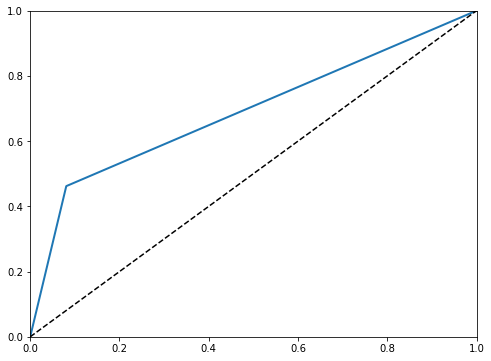

In [53]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [54]:
roc_auc_score(y_test, pred_labels)

0.6905742204655249

In [55]:
pred_probas = gaussian_clf.predict_proba(final_X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_probas[:, 1])

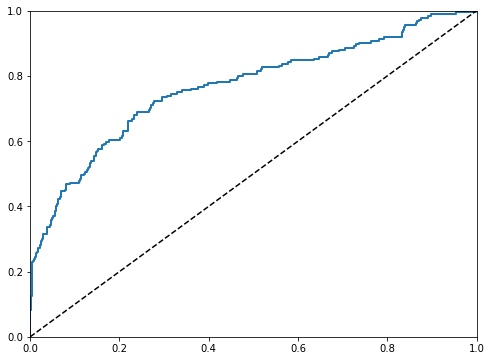

In [56]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

### Cross-Validation

In [57]:
from sklearn.model_selection import cross_val_predict, cross_val_score
cv_gaussian_clf = GaussianNB()
y_train_scores = cross_val_score(cv_gaussian_clf, final_X_train, y_train, cv=5, scoring = "accuracy")

In [58]:
print(y_train_scores)
print(y_train_scores.mean())

[0.82586428 0.80921895 0.80769231 0.83974359 0.82179487]
0.8208627991726584


In [59]:
cat_X_train = pd.concat([labelled_X_train[ord_cat], oh_X_train], axis = 1)
cat_X_test = pd.concat([labelled_X_test[ord_cat], oh_X_test], axis = 1)

### Mixed Naive Bayes with CategoricalNB & GaussianNB

In [60]:
second_gaussian_clf = GaussianNB()
G_clf = second_gaussian_clf.fit(middle_X_train, y_train)
# Categorical model for discrete independent variable
categorical_clf = CategoricalNB()
C_clf = categorical_clf.fit(cat_X_train, y_train)

In [61]:
# Get probability predictions from each model 
# On training data
G_train_probas = second_gaussian_clf.predict_proba(middle_X_train)
C_train_probas = categorical_clf.predict_proba(cat_X_train)
# On testing data
G_test_probas = second_gaussian_clf.predict_proba(middle_X_test)
C_test_probas = categorical_clf.predict_proba(cat_X_test)

In [62]:
X_new_train = np.c_[(G_train_probas[:,1], C_train_probas[:,1])] # Train
X_new_test = np.c_[(G_test_probas[:,1], C_test_probas[:,1])] # Test

In [63]:
last_gaussian_clf = GaussianNB()
last_gaussian_clf.fit(X_new_train, y_train)

last_pred_labels = last_gaussian_clf.predict(X_new_test)

In [64]:
new_score = last_gaussian_clf.score(X_new_test, y_test)
new_score

0.8391393442622951

In [65]:
print("Confusion Matrix:\n", confusion_matrix(y_test, last_pred_labels))
print("\nPrecision Score:   ", precision_score(y_test, last_pred_labels))
print("Recall Score:   ", recall_score(y_test, last_pred_labels))
print("F1 Score:   ", f1_score(y_test, last_pred_labels))

Confusion Matrix:
 [[729  63]
 [ 94  90]]

Precision Score:    0.5882352941176471
Recall Score:    0.4891304347826087
F1 Score:    0.5341246290801187


-----

# <span style='background:yellow'> Clustering </span>

--------

In [66]:
X_train_clustering = middle_X_train[["Age", "MonthlyIncome"]]
X_test_clustering = middle_X_test[["Age", "MonthlyIncome"]]

In [67]:
X_train_clustering

Age  MonthlyIncome
781   36.0        22338.0
2039  36.0        22587.0
1944  24.0        17725.0
3099  34.0        20955.0
346   41.0        21032.0
...    ...            ...
2522  38.0        32342.0
931   30.0        19695.0
820   35.0        19968.0
50    48.0        20381.0
1537  45.0        24724.0

[3902 rows x 2 columns]

In [68]:
X_train_clustering.describe()

Age  MonthlyIncome
count  3902.000000    3902.000000
mean     37.574833   23583.390056
std       9.158515    5106.695893
min      18.000000   16009.000000
25%      31.000000   20514.500000
50%      36.000000   22338.000000
75%      43.000000   25402.250000
max      61.000000   38677.000000

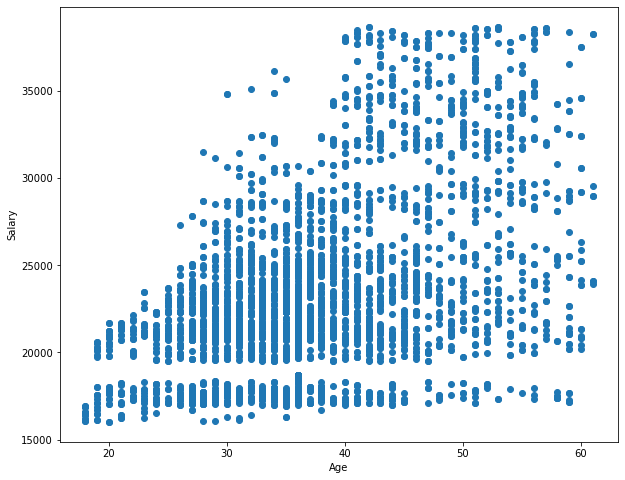

In [69]:
plt.figure(figsize = (10,8))
plt.scatter(X_train_clustering.iloc[:, 0], X_train_clustering.iloc[:, 1])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

**We can see the range of the values for each feature is different & this will adversly affect the performance of the KMeans algorithm, so scaling them is necessary.**

## Features Scaling 

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()
scaled_X_train_clustering = scaler.fit_transform(X_train_clustering)

## Model Building

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [73]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(scaled_X_train_clustering)
kmeans.score(scaled_X_train_clustering)

-124.8779525561468

In [74]:
n_clusters_range = np.arange(5, 15)
inertias = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 1)
    kmeans.fit(scaled_X_train_clustering)
    inertias.append(kmeans.inertia_)

### Elbow Method

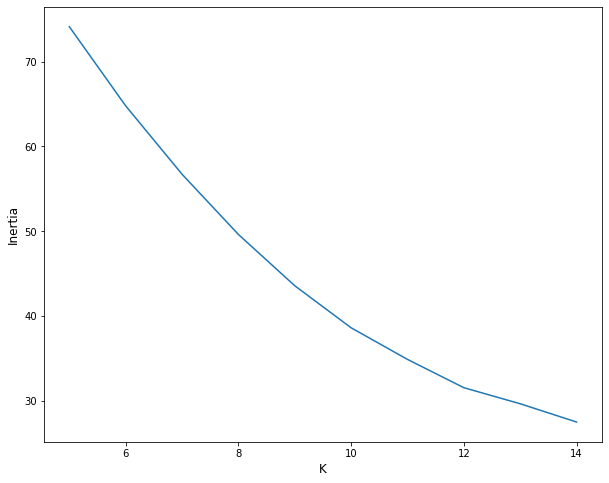

In [75]:
plt.figure(figsize = (10,8))
plt.plot(n_clusters_range, inertias)
plt.xlabel("K", fontsize = 12)
plt.ylabel("Inertia", fontsize = 12)
plt.show()

### Silhouettte Score Method

For n_clusters = 6 The average silhouette_score is : 0.3448214634401572
For n_clusters = 7 The average silhouette_score is : 0.3520383009504232
For n_clusters = 8 The average silhouette_score is : 0.35351743531025764
For n_clusters = 9 The average silhouette_score is : 0.3576312842903845
For n_clusters = 10 The average silhouette_score is : 0.3647261439213562


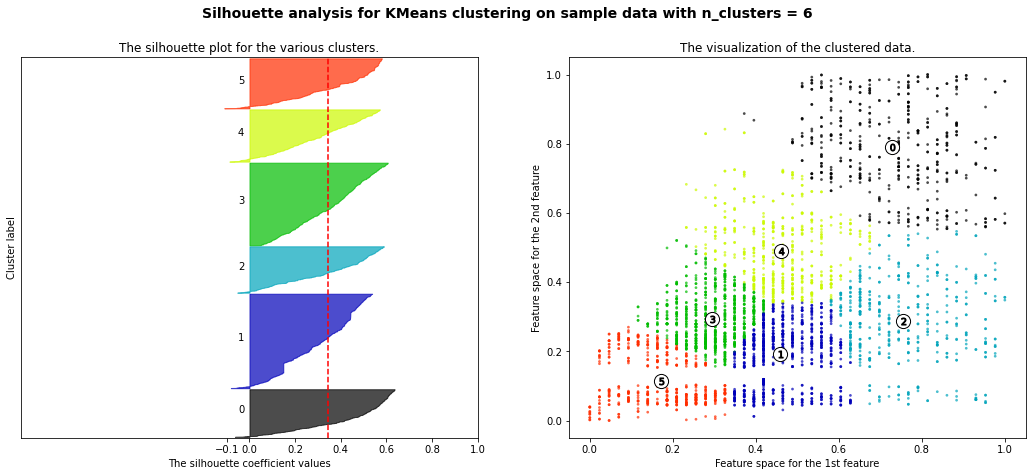

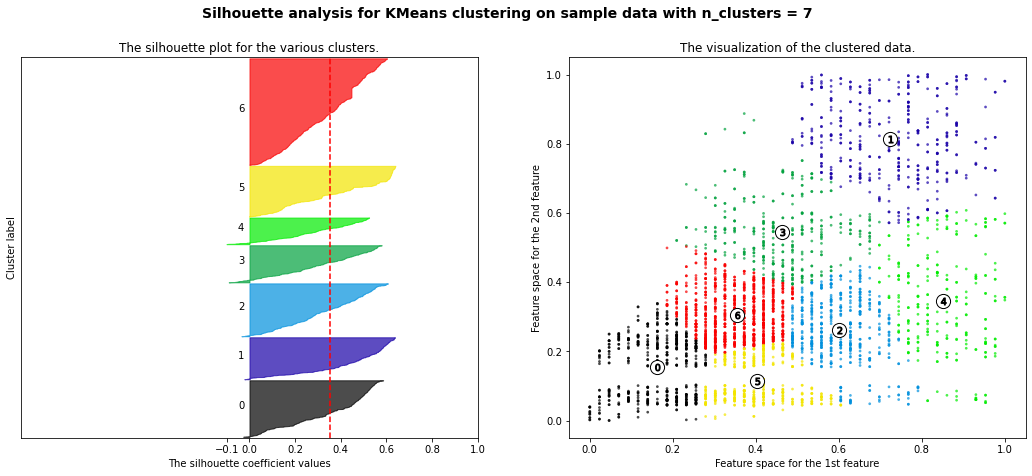

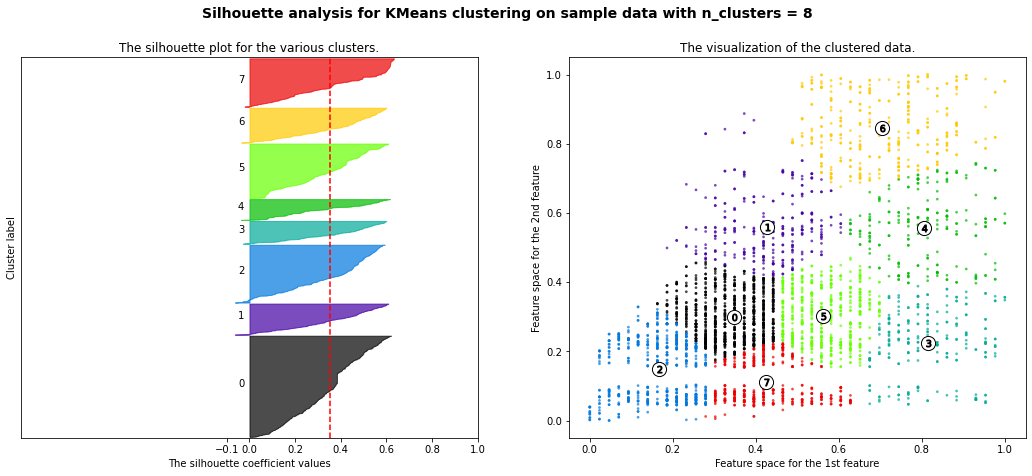

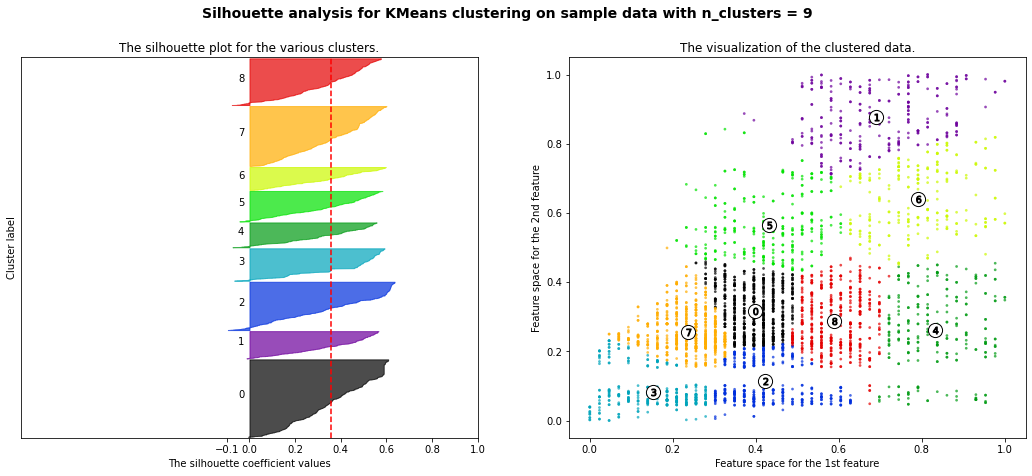

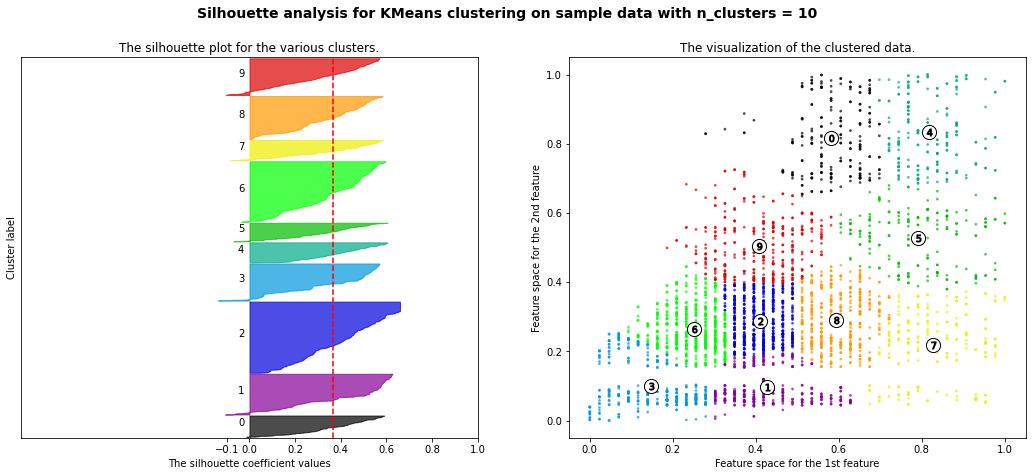

In [76]:
import matplotlib.cm as cm

range_n_clusters = [6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(scaled_X_train_clustering) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_X_train_clustering)

    silhouette_avg = silhouette_score(scaled_X_train_clustering, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(scaled_X_train_clustering, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_X_train_clustering[:, 0], scaled_X_train_clustering[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<span style='color:blue'>**The dataset is not suitable for clustring, but we can see that the algorithm can come up with different clusters for the selected features. As there are no clear patterns of clusters, increasing the number of clusters doesnt draw any valuable information.**</span>

<span style='color:blue'>**If we compare clustering with classfication on this dataset, we can successfully accomplish a decent result of classifying the customers according to whether they will purchase the product or no, but to find any implicit patterns among customers collected data, the KMeans algorithm doesn perform so well**</span>

In [77]:
scaled_X_test_clustering = scaler.transform(X_test_clustering)

In [78]:
kmeans = KMeans(n_clusters = 6, random_state = 1)
kmeans.fit(scaled_X_train_clustering)
kmeans.predict(scaled_X_test_clustering)[:10]

array([2, 4, 2, 4, 5, 2, 4, 5, 5, 5])

## Kmodes Clustering for categorical Variables

In [79]:
from kmodes.kmodes import KModes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 812, cost: 8634.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 724, cost: 8196.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 572, cost: 7658.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 572, cost: 6846.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/

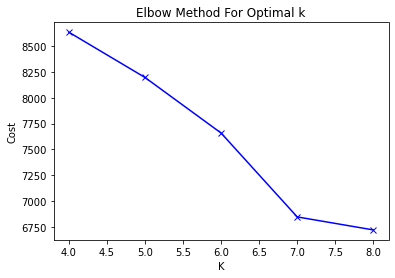

In [80]:
costs = []
travel_kmodes_clustering = travel.copy()
k = range(4,9)
for num_clusters in list(k):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 10, verbose=1)
    kmode.fit_predict(travel_kmodes_clustering[object_cols])
    costs.append(kmode.cost_)
    
plt.plot(k, costs, 'bx-')
plt.xlabel('K')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

**From the figure above, we can see an elbow at k=7, so we will apply kmodes using this number of clusters**

In [81]:
kmode = KModes(n_clusters=7, init = "random", n_init = 10, verbose=1)
clusters = kmode.fit_predict(travel_kmodes_clustering[object_cols])
travel_kmodes_clustering["clusters"] = clusters
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 926, cost: 7031.0
Run 1, iteration: 2/100, moves: 599, cost: 7031.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 7663.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1274, cost: 7253.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 978, cost: 7527.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 314, cost: 7817.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 130, cost: 7711.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 1194, cost: 8319.0
Run 7, iteration: 2/100, moves: 139, cos

array([3, 1, 2, ..., 0, 4, 2], dtype=uint16)

## Visualizing different features counts of k=7

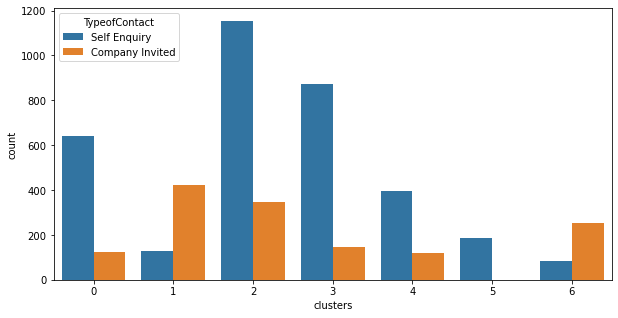

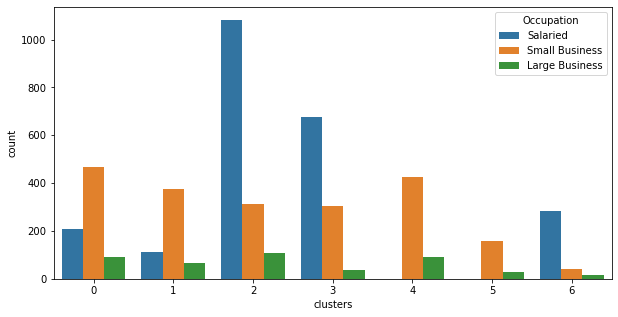

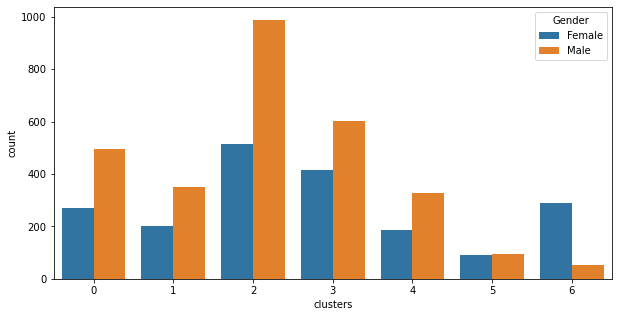

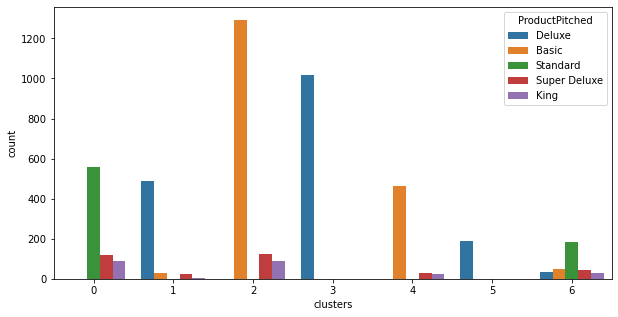

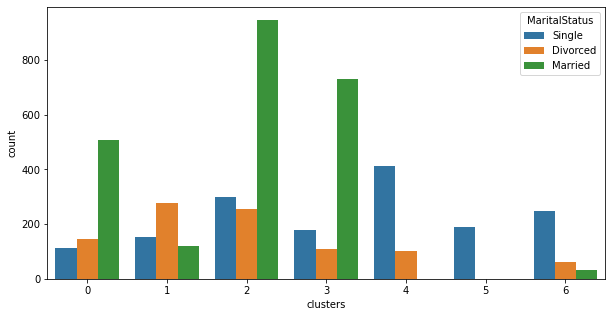

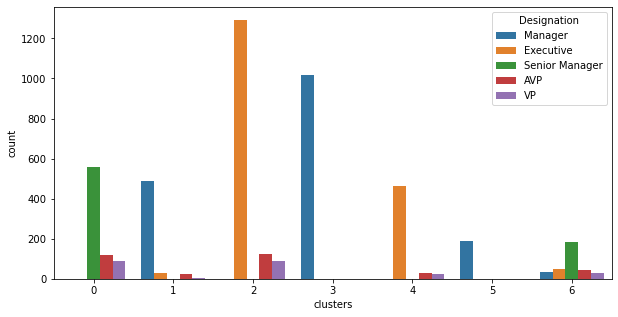

In [82]:
for col in object_cols:
    plt.subplots(figsize = (10,5))
    sns.countplot(x='clusters' ,hue=col, data = travel_kmodes_clustering)
    plt.show()

---

# <span style='background:yellow'> Decision Trees </span>

In [83]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

**Apply Decision Trees to the X_train dataset without cross-validation**

In [84]:
final_X_train.columns

Index([                     'Age',          'DurationOfPitch',
              'NumberOfFollowups',    'PreferredPropertyStar',
                  'NumberOfTrips', 'NumberOfChildrenVisiting',
                  'MonthlyIncome',                 'CityTier',
         'NumberOfPersonVisiting',                 'Passport',
         'PitchSatisfactionScore',                   'OwnCar',
                     'Occupation',           'ProductPitched',
                    'Designation',                          0,
                                1,                          2,
                                3,                          4,
                                5,                          6],
      dtype='object')

In [85]:
final_X_train_dt = final_X_train[[                     'Age',          'DurationOfPitch',
              'NumberOfFollowups',    'PreferredPropertyStar',
                  'NumberOfTrips', 'NumberOfChildrenVisiting',
                  'MonthlyIncome',                 'CityTier',
         'NumberOfPersonVisiting',                 'Passport',
         'PitchSatisfactionScore',                   'OwnCar',
                     'Occupation',           'ProductPitched',
                    'Designation']]

final_X_test_dt = final_X_test[[                     'Age',          'DurationOfPitch',
              'NumberOfFollowups',    'PreferredPropertyStar',
                  'NumberOfTrips', 'NumberOfChildrenVisiting',
                  'MonthlyIncome',                 'CityTier',
         'NumberOfPersonVisiting',                 'Passport',
         'PitchSatisfactionScore',                   'OwnCar',
                     'Occupation',           'ProductPitched',
                    'Designation']]

### Tree of depth = 1

In [86]:
dt_clf = DecisionTreeClassifier(max_depth=1, random_state=1)
dt_clf.fit(final_X_train_dt, y_train)

DecisionTreeClassifier(max_depth=1, random_state=1)

[Text(223.2, 163.07999999999998, 'Passport <= 0.5\ngini = 0.305\nsamples = 3902\nvalue = [3168, 734]\nclass = Not Taken'),
 Text(111.6, 54.360000000000014, 'gini = 0.22\nsamples = 2800\nvalue = [2447, 353]\nclass = Not Taken'),
 Text(334.79999999999995, 54.360000000000014, 'gini = 0.452\nsamples = 1102\nvalue = [721, 381]\nclass = Not Taken')]

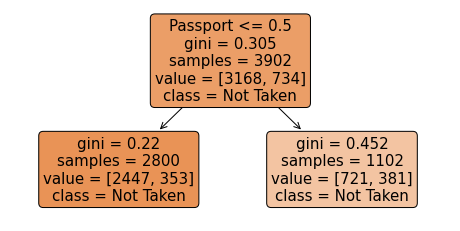

In [87]:
fig = plt.figure(figsize=(8,4))
plot_tree(dt_clf, fontsize = 15,feature_names = final_X_train_dt.columns, class_names = ["Not Taken", "Taken"],
          label = "all", rounded = True ,filled = True)

In [88]:
dt_clf.predict_proba(final_X_test_dt)

array([[0.65426497, 0.34573503],
       [0.87392857, 0.12607143],
       [0.87392857, 0.12607143],
       ...,
       [0.87392857, 0.12607143],
       [0.87392857, 0.12607143],
       [0.87392857, 0.12607143]])

In [89]:
dt_clf.predict(final_X_test_dt)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [90]:
score = dt_clf.score(final_X_test_dt, y_test)
score

0.8114754098360656

### Tree of depth = 2

In [91]:
dt_clf_2 = DecisionTreeClassifier(max_depth=2, random_state=1)
dt_clf_2.fit(final_X_train_dt, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

[Text(418.5, 271.8, 'Passport <= 0.5\ngini = 0.305\nsamples = 3902\nvalue = [3168, 734]\nclass = Not Taken'),
 Text(209.25, 163.08, 'Age <= 21.5\ngini = 0.22\nsamples = 2800\nvalue = [2447, 353]\nclass = Not Taken'),
 Text(104.625, 54.360000000000014, 'gini = 0.499\nsamples = 71\nvalue = [37, 34]\nclass = Not Taken'),
 Text(313.875, 54.360000000000014, 'gini = 0.206\nsamples = 2729\nvalue = [2410, 319]\nclass = Not Taken'),
 Text(627.75, 163.08, 'ProductPitched <= 0.5\ngini = 0.452\nsamples = 1102\nvalue = [721, 381]\nclass = Not Taken'),
 Text(523.125, 54.360000000000014, 'gini = 0.494\nsamples = 440\nvalue = [195, 245]\nclass = Taken'),
 Text(732.375, 54.360000000000014, 'gini = 0.326\nsamples = 662\nvalue = [526, 136]\nclass = Not Taken')]

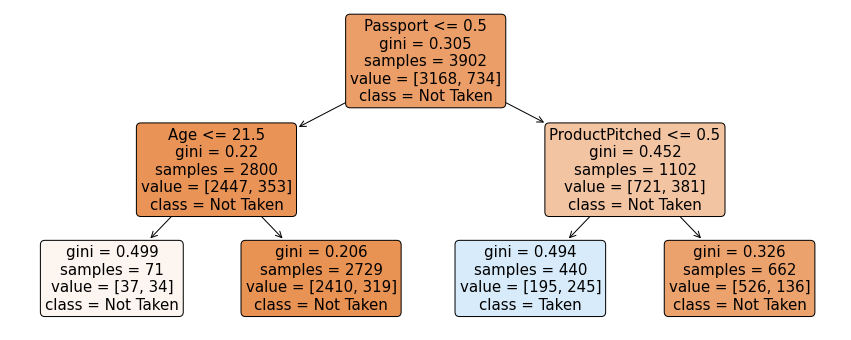

In [92]:
fig = plt.figure(figsize=(15,6))
plot_tree(dt_clf_2, fontsize = 15,feature_names = final_X_train_dt.columns, class_names = ["Not Taken", "Taken"],
          label = "all", rounded = True ,filled = True)

In [93]:
score = dt_clf_2.score(final_X_test_dt, y_test)
score

0.8381147540983607

### Tree of depth = 3

In [94]:
dt_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=1)
dt_clf_3.fit(final_X_train_dt, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

[Text(697.5, 475.65000000000003, 'Passport <= 0.5\ngini = 0.305\nsamples = 3902\nvalue = [3168, 734]\nclass = Not Taken'),
 Text(348.75, 339.75, 'Age <= 21.5\ngini = 0.22\nsamples = 2800\nvalue = [2447, 353]\nclass = Not Taken'),
 Text(174.375, 203.85000000000002, 'Occupation <= 0.5\ngini = 0.499\nsamples = 71\nvalue = [37, 34]\nclass = Not Taken'),
 Text(87.1875, 67.94999999999999, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = Taken'),
 Text(261.5625, 67.94999999999999, 'gini = 0.473\nsamples = 60\nvalue = [37, 23]\nclass = Not Taken'),
 Text(523.125, 203.85000000000002, 'PreferredPropertyStar <= 4.5\ngini = 0.206\nsamples = 2729\nvalue = [2410, 319]\nclass = Not Taken'),
 Text(435.9375, 67.94999999999999, 'gini = 0.176\nsamples = 2215\nvalue = [1999, 216]\nclass = Not Taken'),
 Text(610.3125, 67.94999999999999, 'gini = 0.32\nsamples = 514\nvalue = [411, 103]\nclass = Not Taken'),
 Text(1046.25, 339.75, 'ProductPitched <= 0.5\ngini = 0.452\nsamples = 1102\nvalue = [721, 381]\ncl

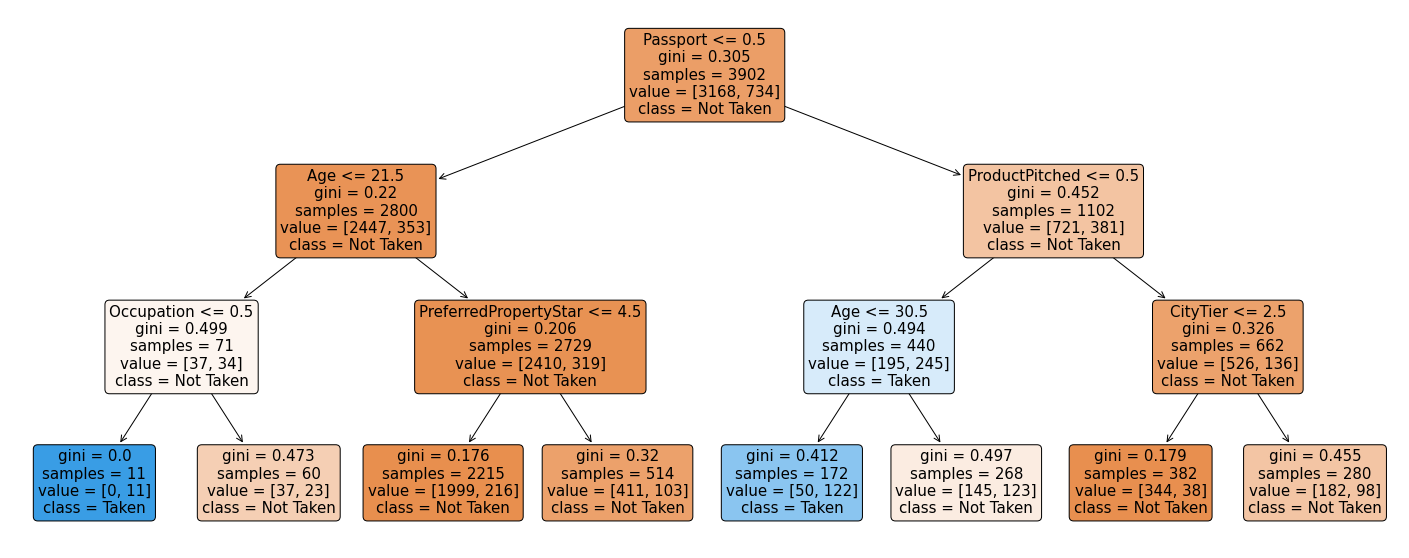

In [95]:
fig = plt.figure(figsize=(25,10))
plot_tree(dt_clf_3, fontsize = 15,feature_names = final_X_train_dt.columns, class_names = ["Not Taken", "Taken"],
          label = "all", rounded = True ,filled = True)

In [96]:
score = dt_clf_3.score(final_X_test_dt, y_test)
score

0.8391393442622951

### Classifying with lower number of features

In [97]:
dt_cols = ['Age','PreferredPropertyStar','MonthlyIncome','CityTier','OwnCar','Occupation', 'Designation']
X_train_dt = final_X_train[dt_cols]
y_train_dt = final_X_train['ProductPitched']
X_test_dt = final_X_test[dt_cols]
y_test_dt = final_X_test['ProductPitched']

In [98]:
dt_clf_4 = DecisionTreeClassifier(max_depth=3, random_state=1)
dt_clf_4.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=3, random_state=1)

[Text(620.0, 475.65000000000003, 'Designation <= 1.5\ngini = 0.703\nsamples = 3902\nvalue = [1476, 1376, 195, 576, 279]\nclass = Basic'),
 Text(310.0, 339.75, 'Designation <= 0.5\ngini = 0.267\nsamples = 1755\nvalue = [1476, 0, 0, 0, 279]\nclass = Basic'),
 Text(155.0, 203.85000000000002, 'gini = 0.0\nsamples = 279\nvalue = [0, 0, 0, 0, 279]\nclass = King'),
 Text(465.0, 203.85000000000002, 'gini = 0.0\nsamples = 1476\nvalue = [1476, 0, 0, 0, 0]\nclass = Basic'),
 Text(930.0, 339.75, 'Designation <= 2.5\ngini = 0.509\nsamples = 2147\nvalue = [0, 1376, 195, 576, 0]\nclass = Standard'),
 Text(775.0, 203.85000000000002, 'gini = 0.0\nsamples = 1376\nvalue = [0, 1376, 0, 0, 0]\nclass = Standard'),
 Text(1085.0, 203.85000000000002, 'Designation <= 3.5\ngini = 0.378\nsamples = 771\nvalue = [0, 0, 195, 576, 0]\nclass = Super Deluxe'),
 Text(930.0, 67.94999999999999, 'gini = 0.0\nsamples = 576\nvalue = [0, 0, 0, 576, 0]\nclass = Super Deluxe'),
 Text(1240.0, 67.94999999999999, 'gini = 0.0\nsamp

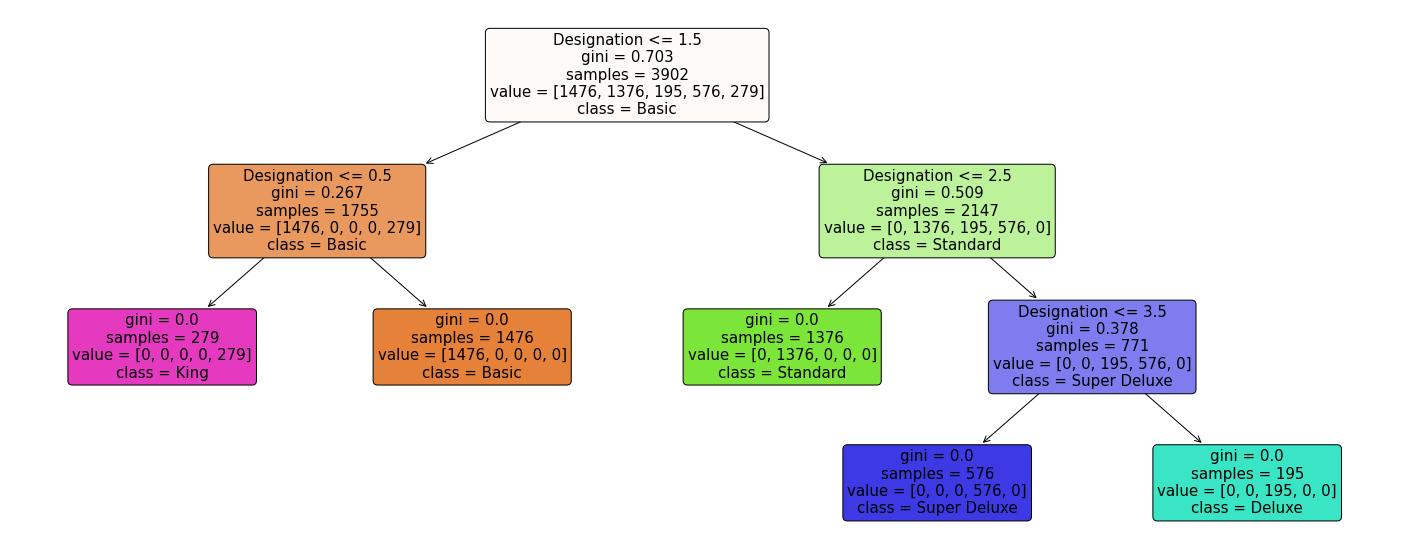

In [99]:
fig = plt.figure(figsize=(25,10))
plot_tree(dt_clf_4, fontsize = 15,feature_names = X_train_dt.columns, 
          class_names = ["Basic", "Standard", "Deluxe", "Super Deluxe", "King"],
          label = "all", rounded = True ,filled = True)

**Here the decision tree cant be branched any further as its leaf nodes are totally pure & it seems it overfitted the training data**

In [100]:
ord_encoder.categories_

[array(['Large Business', 'Salaried', 'Small Business'], dtype=object),
 array(['Basic', 'Deluxe', 'King', 'Standard', 'Super Deluxe'],
       dtype=object),
 array(['AVP', 'Executive', 'Manager', 'Senior Manager', 'VP'],
       dtype=object)]

In [101]:
score = dt_clf_4.score(X_test_dt, y_test)
score

0.29405737704918034

### Limiting max # of features

[Text(837.0, 475.65000000000003, 'MonthlyIncome <= 22623.5\ngini = 0.703\nsamples = 3902\nvalue = [1476, 1376, 195, 576, 279]\nclass = Basic'),
 Text(418.5, 339.75, 'MonthlyIncome <= 18694.5\ngini = 0.468\nsamples = 2120\nvalue = [1387, 683, 2, 45, 3]\nclass = Basic'),
 Text(209.25, 203.85000000000002, 'Age <= 35.5\ngini = 0.127\nsamples = 666\nvalue = [621, 39, 1, 4, 1]\nclass = Basic'),
 Text(104.625, 67.94999999999999, 'gini = 0.042\nsamples = 419\nvalue = [410, 7, 1, 1, 0]\nclass = Basic'),
 Text(313.875, 67.94999999999999, 'gini = 0.253\nsamples = 247\nvalue = [211, 32, 0, 3, 1]\nclass = Basic'),
 Text(627.75, 203.85000000000002, 'CityTier <= 2.5\ngini = 0.525\nsamples = 1454\nvalue = [766, 644, 1, 41, 2]\nclass = Basic'),
 Text(523.125, 67.94999999999999, 'gini = 0.479\nsamples = 1035\nvalue = [656, 357, 0, 22, 0]\nclass = Basic'),
 Text(732.375, 67.94999999999999, 'gini = 0.46\nsamples = 419\nvalue = [110, 287, 1, 19, 2]\nclass = Standard'),
 Text(1255.5, 339.75, 'MonthlyIncome 

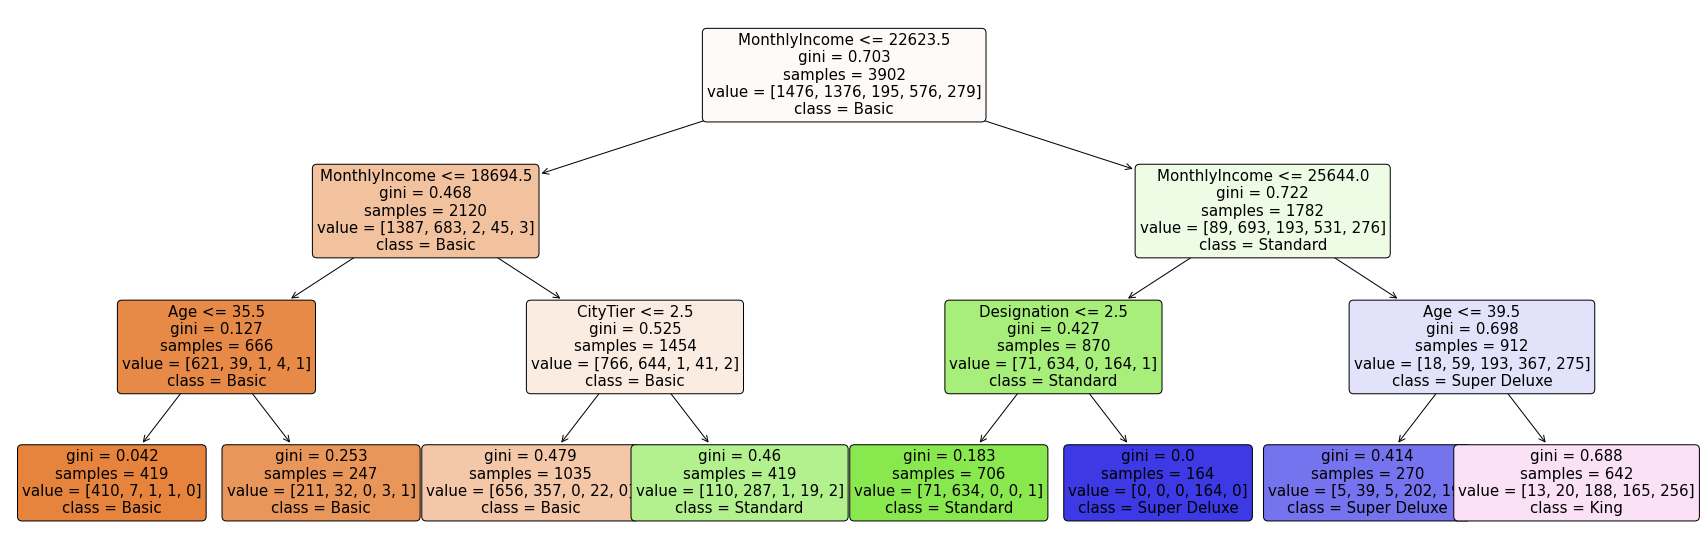

In [102]:
dt_clf_5 = DecisionTreeClassifier(max_depth=3, max_features = 2, random_state=1)
dt_clf_5.fit(X_train_dt, y_train_dt)
fig = plt.figure(figsize=(30,10))
plot_tree(dt_clf_5, fontsize = 15,feature_names = X_train_dt.columns, 
          class_names = ["Basic", "Standard", "Deluxe", "Super Deluxe", "King"],
          label = "all", rounded = True ,filled = True)

In [103]:
score = dt_clf_5.score(X_test_dt, y_test)
score

0.39549180327868855

### Limiting # of samples in a leaf node

[Text(837.0, 475.65000000000003, 'MonthlyIncome <= 22623.5\ngini = 0.703\nsamples = 3902\nvalue = [1476, 1376, 195, 576, 279]\nclass = Basic'),
 Text(334.8, 339.75, 'MonthlyIncome <= 18694.5\ngini = 0.468\nsamples = 2120\nvalue = [1387, 683, 2, 45, 3]\nclass = Basic'),
 Text(167.4, 203.85000000000002, 'gini = 0.127\nsamples = 666\nvalue = [621, 39, 1, 4, 1]\nclass = Basic'),
 Text(502.20000000000005, 203.85000000000002, 'MonthlyIncome <= 20765.5\ngini = 0.525\nsamples = 1454\nvalue = [766, 644, 1, 41, 2]\nclass = Basic'),
 Text(334.8, 67.94999999999999, 'gini = 0.424\nsamples = 403\nvalue = [116, 283, 0, 4, 0]\nclass = Standard'),
 Text(669.6, 67.94999999999999, 'gini = 0.498\nsamples = 1051\nvalue = [650, 361, 1, 37, 2]\nclass = Basic'),
 Text(1339.2, 339.75, 'CityTier <= 2.5\ngini = 0.722\nsamples = 1782\nvalue = [89, 693, 193, 531, 276]\nclass = Standard'),
 Text(1171.8, 203.85000000000002, 'MonthlyIncome <= 25644.0\ngini = 0.754\nsamples = 1098\nvalue = [77, 350, 158, 331, 182]\ncl

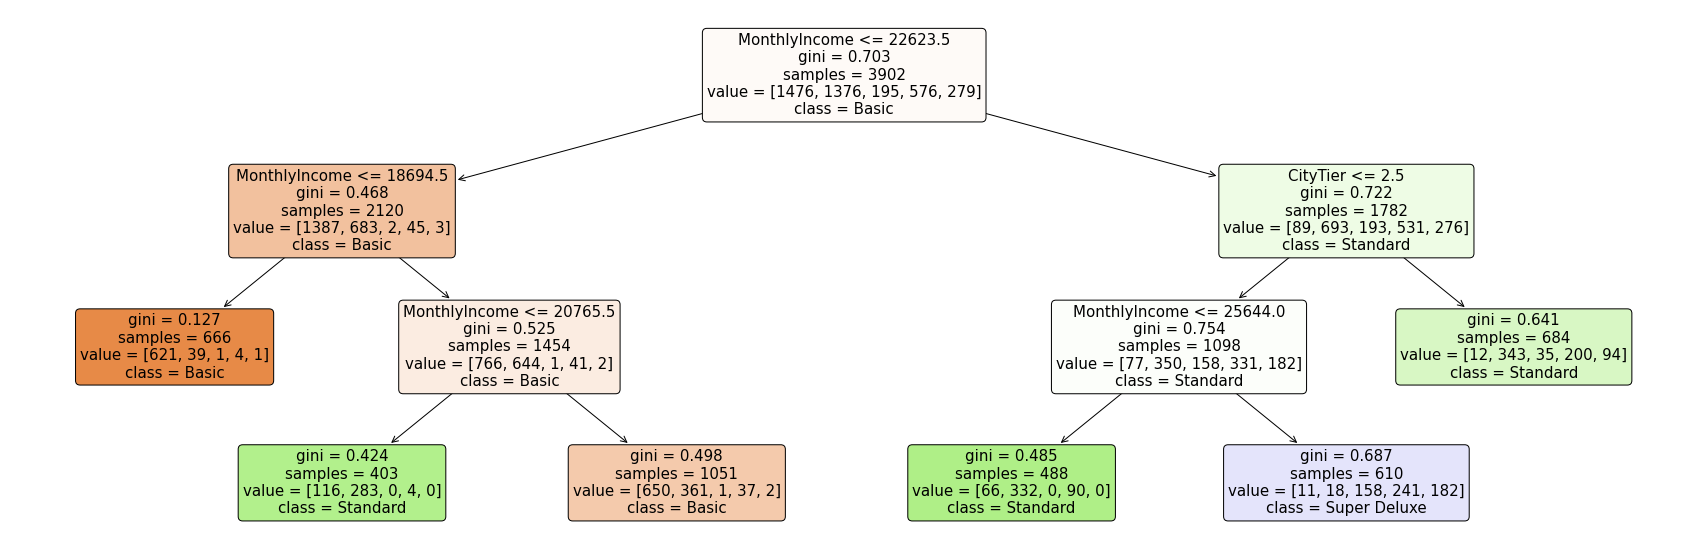

In [104]:
dt_clf_6 = DecisionTreeClassifier(max_depth=3, max_features = 2, min_samples_leaf = 400, random_state=1)
dt_clf_6.fit(X_train_dt, y_train_dt)
fig = plt.figure(figsize=(30,10))
plot_tree(dt_clf_6, fontsize = 15,feature_names = X_train_dt.columns, 
          class_names = ["Basic", "Standard", "Deluxe", "Super Deluxe", "King"],
          label = "all", rounded = True ,filled = True)

In [105]:
score = dt_clf_6.score(X_test_dt, y_test)
score

0.41290983606557374

### Applying cross-validation

In [106]:
y_train_scores = cross_val_score(dt_clf_6, X_train_dt, y_train_dt, cv=5, scoring = "accuracy")
print(y_train_scores)
print(y_train_scores.mean())

[0.61331626 0.60819462 0.62564103 0.61153846 0.60769231]
0.6132765356709019


In [107]:
y_train_scores = cross_val_score(dt_clf_5, X_train_dt, y_train_dt, cv=5, scoring = "accuracy")
print(y_train_scores)
print(y_train_scores.mean())

[0.72599232 0.72215109 0.73205128 0.71025641 0.71538462]
0.7211671427164386


**Its obvious that corss-validation applied on dt_clf_5 & dt_clf_6 increased the training accuracy**

In [108]:
y_train_scores = cross_val_score(dt_clf_3, final_X_test_dt, y_test, cv=5, scoring = "accuracy")
print(y_train_scores)
print(y_train_scores.mean())

[0.85714286 0.79487179 0.83589744 0.84102564 0.86666667]
0.8391208791208792


[Text(697.5, 475.65000000000003, 'MonthlyIncome <= 21304.5\ngini = 0.305\nsamples = 3902\nvalue = [3168, 734]\nclass = Not Taken'),
 Text(348.75, 339.75, 'MonthlyIncome <= 16927.5\ngini = 0.39\nsamples = 1441\nvalue = [1058, 383]\nclass = Not Taken'),
 Text(174.375, 203.85000000000002, 'MonthlyIncome <= 16748.0\ngini = 0.497\nsamples = 41\nvalue = [19, 22]\nclass = Taken'),
 Text(87.1875, 67.94999999999999, 'gini = 0.496\nsamples = 35\nvalue = [19, 16]\nclass = Not Taken'),
 Text(261.5625, 67.94999999999999, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Taken'),
 Text(523.125, 203.85000000000002, 'Occupation <= 0.5\ngini = 0.383\nsamples = 1400\nvalue = [1039, 361]\nclass = Not Taken'),
 Text(435.9375, 67.94999999999999, 'gini = 0.476\nsamples = 136\nvalue = [83, 53]\nclass = Not Taken'),
 Text(610.3125, 67.94999999999999, 'gini = 0.369\nsamples = 1264\nvalue = [956, 308]\nclass = Not Taken'),
 Text(1046.25, 339.75, 'NumberOfFollowups <= 5.5\ngini = 0.245\nsamples = 2461\nvalue = [

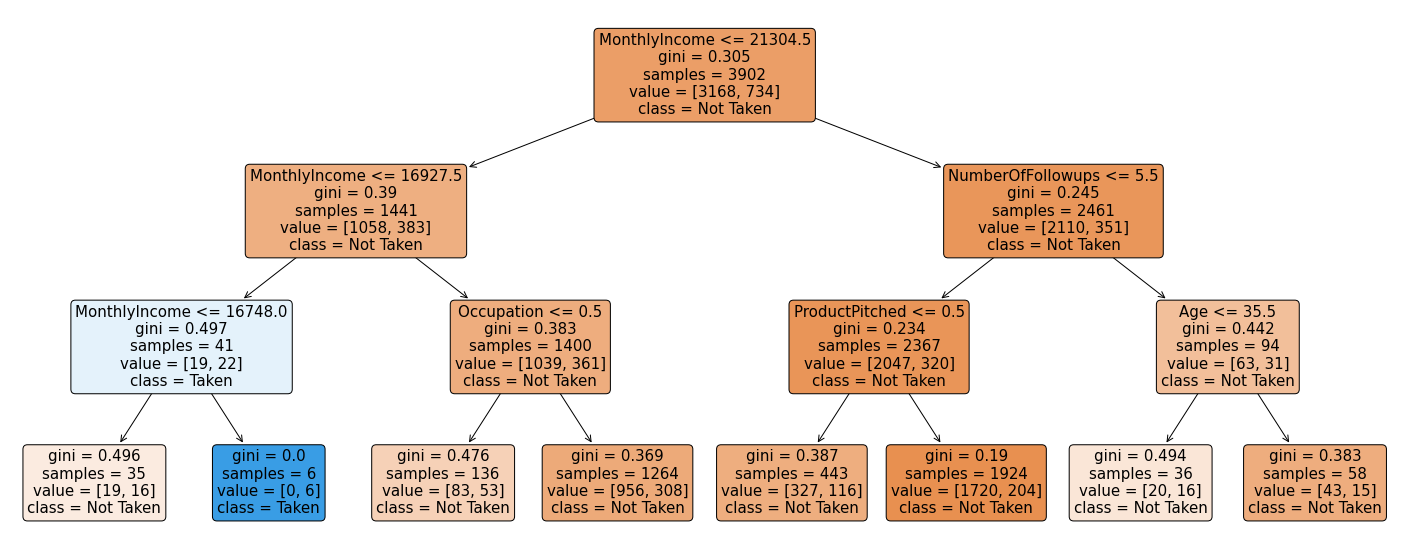

In [109]:
dt_clf_3_1 = DecisionTreeClassifier(max_depth=3, max_features = 2, random_state=1)
dt_clf_3_1.fit(final_X_train_dt, y_train)
fig = plt.figure(figsize=(25,10))
plot_tree(dt_clf_3_1, fontsize = 15,feature_names = final_X_train_dt.columns, class_names = ["Not Taken", "Taken"],
          label = "all", rounded = True ,filled = True)

In [110]:
y_train_scores = cross_val_score(dt_clf_3_1, final_X_test_dt, y_test, cv=5, scoring = "accuracy")
print(y_train_scores)
print(y_train_scores.mean())

[0.82142857 0.81538462 0.78974359 0.80512821 0.8       ]
0.8063369963369963


**Cross-validation applied on decision tree of dt_clf_3_1 reduced the accuracy by limiting the number of features in each split, which indicates the model can be generalized to external datasets**

# <span style='background:yellow'> Linear Regression & Neural Networks </span>

### Applying Logistic Regression without cross-validation

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [139]:
log_reg = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=1)
log_reg.fit(middle_X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [140]:
y_pred = log_reg.predict(middle_X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8391393442622951
Precision: 0.7454545454545455
Recall: 0.22282608695652173


**The Logistic Classifier can be generalized to new data as it has accuracy of 84%**

### Apply Softmax Classifier on Multiclass Target

In [143]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=1, max_iter=3000)
softmax_reg.fit(middle_X_train, y_train_dt) #using previously choosen decision tree target "y_train_dt" of multiclasses

LogisticRegression(max_iter=3000, multi_class='multinomial', random_state=1)

In [144]:
pred_softmax = softmax_reg.predict(middle_X_test)
print("Accuracy:", accuracy_score(y_test_dt, pred_softmax))

Accuracy: 0.5522540983606558


**Softmax Classifier seems to be less accurate compared to Binary Logistic Regression Classifier**

### Applying Logistic Regression with cross-validation

In [147]:
logreg_scores = cross_val_score(log_reg, middle_X_train, y_train, cv=10, scoring = "accuracy")
print(logreg_scores)
print(logreg_scores.mean())

[0.81585678 0.8286445  0.83846154 0.81282051 0.81538462 0.84615385
 0.83846154 0.83076923 0.83589744 0.81794872]
0.8280398714669813


In [148]:
logreg_softmax_scores = cross_val_score(softmax_reg, middle_X_train, y_train_dt, cv=10, scoring = "accuracy")
print(logreg_softmax_scores)
print(logreg_softmax_scores.mean())

C:\Users\MR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.59079284 0.60102302 0.59487179 0.57179487 0.56923077 0.55897436
 0.59487179 0.60512821 0.54358974 0.53846154]
0.576873893370057


**From the experimentation, cross validation didnt improve the Binary Classifier accuracy, but it did improve the Multiclass Classifier accuracy with a small margin**

# <span style='background:lightblue'> Perceptrons </span>

In [149]:
from sklearn.neural_network import MLPClassifier

#### Training simple NN with default parameters

In [150]:
mlp = MLPClassifier(max_iter=3000, random_state=1)
mlp.fit(middle_X_train, y_train)
mlp.score(middle_X_test, y_test)

0.8114754098360656

### Varying the MLP parameters to check its performance

In [155]:
mlp_2 = MLPClassifier(hidden_layer_sizes = (5,4,3), activation = "logistic", solver = "sgd",
                      max_iter=5000,learning_rate_init = 0.01, random_state=1)
mlp_2.fit(middle_X_train, y_train)
mlp_2.score(middle_X_test, y_test)

0.8114754098360656

In [160]:
mlp_3 = MLPClassifier(hidden_layer_sizes = (2,3,2), activation = "tanh", solver = "sgd",
                      max_iter=4000,learning_rate_init = 0.01, random_state=1)
mlp_3.fit(middle_X_train, y_train)
mlp_3.score(middle_X_test, y_test)

0.8114754098360656

In [161]:
mlp_4 = MLPClassifier(hidden_layer_sizes = (4,6), activation = "relu", solver = "adam",
                      max_iter=6000,learning_rate_init = 0.003, random_state=1)
mlp_4.fit(middle_X_train, y_train)
mlp_4.score(middle_X_test, y_test)

0.8114754098360656

### Apply MLP on multiclass target

In [162]:
mlp_5 = MLPClassifier(hidden_layer_sizes = (5,4,3), activation = "logistic", solver = "sgd",
                      max_iter=5000,learning_rate_init = 0.01, random_state=1)
mlp_5.fit(middle_X_train, y_train_dt)
mlp_5.score(middle_X_test, y_test_dt)

0.36885245901639346

In [163]:
mlp_6 = MLPClassifier(hidden_layer_sizes = (2,3,5), activation = "tanh", solver = "sgd",
                      max_iter=10000,learning_rate_init = 0.001, random_state=1)
mlp_6.fit(middle_X_train, y_train_dt)
mlp_6.score(middle_X_test, y_test_dt)

0.36885245901639346

In [164]:
mlp_7 = MLPClassifier(hidden_layer_sizes = (4,6), activation = "relu", solver = "adam",
                      max_iter=6000,learning_rate_init = 0.003, random_state=1)
mlp_7.fit(middle_X_train, y_train_dt)
mlp_7.score(middle_X_test, y_test_dt)

0.36885245901639346

**From expermintation, the MLP performance is very close to Binary Logistic Regression Classifier, while its performance is very poor compared to the Multiclass Logistic Regression Classifier.**

**Also, changing the parameters of the Neural Network didnt change the resulting accuracy, which might be because of the simplicity & the small size of the dataset when its fed to the MLP**

# <span style='background:yellow'> Research Question </span>

### <span style='background:lightblue'> The Question: </span>

During my experimentation, I encountered a difficulty to apply Clustering on  mixed variables of numerical & categorical types. By doing some research, I found a library called *__Kmodes__* that applies clustering on categorical variables only, meanwhile sklearn clustering requires numerical input to be able to group similar instances.
So, as I have a dataset of mixed variables, I wanted to apply clustering on the full dataset all at once & be able to cluster them combinedly.

<span style='background:orange'> **My question is, how to efficiently cluster mixed dataset with categorical & numerical variables ? & how to visualize the resulting clusters in one graph?**
 </span>
 
 
### <span style='background:lightblue'> The Answer: </span>

For the first part of the question, the initial idea I thought of is to preprocess one type of the variables & transform it into the other type & combine the result in one-typed dataset. For categorical variables, experimentation can be done to quantify categories in either ordered or unordered manner & find a way to deal with their discrete numerical values to fit in the numerical clusterer, then combine them to the numerical variables & use _sklearn_ to perform clustering. For, numerical variables, we can experiment with different methods of discretization to convert them into discrete values & apply _kmodes_ or a similar library on the final categorical dataset.

For the second part, one way of the representation is to visualize the clusters with counts of each variables in each cluster - wheteher its numerical or categorical - in one graph. Other visualization libraries can be consulted to find a more suitable & effective way of visualizeing the result clusters.

### <span style='background:lightgreen'> References: </span>

[1] A. Chaturvedi, P.E.Green, and J.D. Carroll (2001). K-modes Clustering. Researchgate [Viewed 2 November 2021]. Available form: https://www.researchgate.net/publication/226946703_K-modes_Clustering

[2] K. Bindra, A. Mishra (2017). "A Detailed Study of Clustering Algorithms". IEEEXplore [Viewed 4 November 2021]. Available form: https://ieeexplore.ieee.org/document/8342454

[3] K. Wilamowska, M. Manic (2001). "Unsupervised pattern clustering for data mining". IEEEXplore [Viewed 4 November 2021]. Available form: https://ieeexplore.ieee.org/document/975574

[4] Mayra Z. Rodriguez, Cesar H. Comin ,Dalcimar Casanova, Odemir M. Bruno, Diego R. Amancio, Luciano da F. Costa, Francisco A. Rodrigues (2019). "Clustering algorithms: A comparative approach". Plos One [Viewed 7 November 2021]. Available form: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0210236